In [1]:
#scraping

In [2]:
from bs4 import BeautifulSoup
import requests
import openpyxl

In [3]:
#create exel sheet
exel = openpyxl.Workbook()
sheet = exel.active
sheet.title = "top 250 imdb"

In [4]:
#sheet column
sheet.append(["Rank","Name","Year","Rating"])

In [5]:
#start scraping imdb

In [6]:
imdb_url = requests.get("https://www.imdb.com/chart/top")

In [7]:
soup = BeautifulSoup(imdb_url.text,'html.parser')

In [8]:
movies = soup.find('tbody',class_='lister-list').find_all('tr')

In [9]:
for movie in movies :
    rank = movie.find('td',class_='titleColumn').text.split('.')[0].strip()
    name = movie.find('td',class_='titleColumn').a.text
    year = movie.find('td',class_='titleColumn').span.text.strip('()')
    rating = movie.find('td',class_='ratingColumn imdbRating').strong.text
    sheet.append([rank,name,year,rating])
    

In [10]:
#save exel file
#exel.save('Top imdb.csv')

In [11]:
#exploring

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_excel('Top imdb.csv')

In [14]:
data.head(10)

,Rank,Name,Year,Rating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,8.9
5,6,Schindler's List,1993,8.9
6,7,The Lord of the Rings: The Return of the King,2003,8.9
7,8,Pulp Fiction,1994,8.9
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8
9,10,"Il buono, il brutto, il cattivo",1966,8.8


In [15]:
data.tail(10)

,Rank,Name,Year,Rating
240,241,Life of Brian,1979,8.0
241,242,It Happened One Night,1934,8.0
242,243,The Sound of Music,1965,8.0
243,244,Dersu Uzala,1975,8.0
244,245,Ah-ga-ssi,2016,8.0
245,246,Jai Bhim,2021,8.0
246,247,Aladdin,1992,8.0
247,248,Gandhi,1982,8.0
248,249,The Help,2011,8.0
249,250,Beauty and the Beast,1991,8.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    250 non-null    int64  
 1   Name    250 non-null    object 
 2   Year    250 non-null    int64  
 3   Rating  250 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [17]:
data.describe()

,Rank,Year,Rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.460000,8.253600
std,72.312977,25.217456,0.235262
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.750000,8.400000
max,250.000000,2022.000000,9.200000


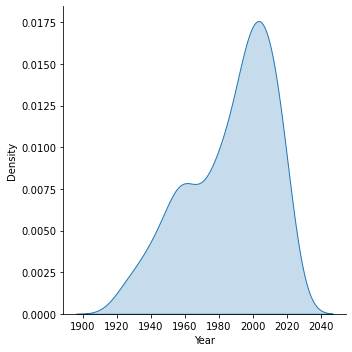

In [18]:
sns.displot(data=data,x='Year',kind='kde',fill=True)

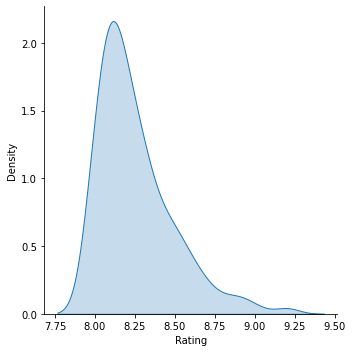

In [19]:
sns.displot(data=data,x='Rating',kind='kde',fill=True)

In [20]:
len(data[data['Year'] < 2000])

153

In [21]:
len(data[data['Year'] >= 2000])

97

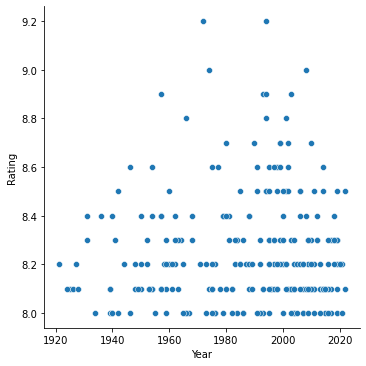

In [22]:
sns.relplot(data=data,x='Year',y='Rating')

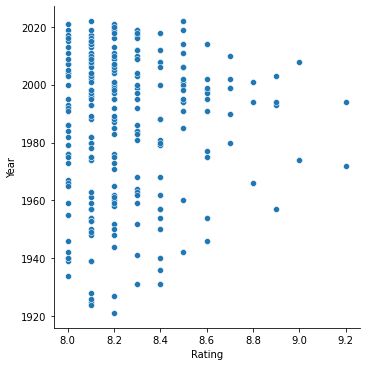

In [23]:
sns.relplot(data=data,x='Rating',y='Year')